In [3]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd

import pickle
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

from tensorflow import keras
import matplotlib

In [71]:
file_names_load = ['lc_classnum_Ia-norm_90.pickle', 
 'lc_classnum_Ia-91bg_67.pickle', 
 'lc_classnum_Iax_52.pickle', 
'lc_classnum_Ib.pickle', 
 'lc_classnum_Ic.pickle',  
 'lc_classnum_Ic-BL.pickle',  
 'lc_classnum_II.pickle', 
 'lc_classnum_IIn.pickle', 
 'lc_classnum_IIb.pickle', 
 'lc_classnum_TDE_64.pickle', 
 'lc_classnum_SLSN-I_60.pickle', 
 'lc_classnum_AGN_70_old.pickle',
 'lc_classnum_CART_63_old.pickle',
 'lc_classnum_Kilonova_99.pickle',
'lc_classnum_PISN_61_old.pickle',
'lc_classnum_ILOT_62_old.pickle',
'lc_classnum_uLens-BSR_90_old.pickle']

file_names = ['lc_classnum_Ia.pickle', 
 'lc_classnum_Ia-91bg.pickle', 
 'lc_classnum_Iax.pickle', 
'lc_classnum_Ib.pickle', 
 'lc_classnum_Ic.pickle',  
 'lc_classnum_Ic-BL.pickle',  
 'lc_classnum_II.pickle', 
 'lc_classnum_IIn.pickle', 
 'lc_classnum_IIb.pickle', 
 'lc_classnum_TDE.pickle', 
 'lc_classnum_SLSN-I.pickle', 
 'lc_classnum_AGN_old.pickle',
 'lc_classnum_CART_old.pickle',
 'lc_classnum_Kilonova.pickle',
'lc_classnum_PISN_old.pickle',
'lc_classnum_ILOT_old.pickle',
'lc_classnum_uLens-BSR.pickle']

classes = ['SNIa', 'SNIa-91bg', 'SNIax', 'SNIb', 'SNIc', 'SNIc-BL', 'SNII', 'SNIIn', 'SNIIb', 'TDE', 'SLSN-I', 'AGN', 'CaRT', 'KNe', 'PISN', 'ILOT', 'uLens-BSR']

file_to_class = dict(zip(file_names, classes))


class_to_file = {v: k for k, v in file_to_class.items()}
class_to_file['SNIa-x'] = class_to_file['SNIax']
class_to_file['SNIa-norm'] = class_to_file['SNIa']

anom_classes = file_names[-5:]
non_anom_classes = file_names[:-5]


color = ['r', 'g', 'y', 'b', 'pink', 'orange', 'gray', 'k', 'm', 'c', 'brown', 'olive']
colors = color

font = {'size'   : 15}

matplotlib.rc('font', **font)    
    

In [7]:
full_data = []
for filename in file_names_load:
  data = pickle.load(open(f"./lightcurves/{filename}", "rb"))
  full_data.append(data)


In [8]:
old_sims={1: 'SNIa-norm', 2: 'SNII', 12: 'SNII', 14: 'SNII', 3: 'SNIbc', 13: 'SNIbc', 41: 'SNIa-91bg', 43: 'SNIa-x', 51: 'Kilonova', 60: 'SLSN-I', 61: 'PISN', 62: 'ILOT', 63: 'CART', 64: 'TDE', 70: 'AGN'}

new_sims={90: 'SNIa-norm', 42: 'SNII', 62: 'SNIbc', 43: 'CCSN', 67: 'SNIa-91bg', 52: 'SNIa-x', 60: 'SLSN-I', 64: 'TDE',
                                         99: 'Kilonova', 'II': 'II', 'IIn': 'II', 'IIb': 'Ibc', 'Ib': 'Ibc', 'Ic': 'Ibc', 'Ic-BL': 'Ibc'}


        

In [9]:
# Plot cadence distributions
mean_cadences = {}
for class_num in range(len(file_names)):

    mean_cadences[class_num] = []
    for key, value in full_data[class_num].items():
        full_data[class_num][key].sort("time")
        mean_cad = np.mean(np.diff(full_data[class_num][key]['time']))
        mean_cadences[class_num].append(mean_cad)
        if (len(mean_cadences) == 13000):
            break
    mean_cadences[class_num] = np.asarray(mean_cadences[class_num])

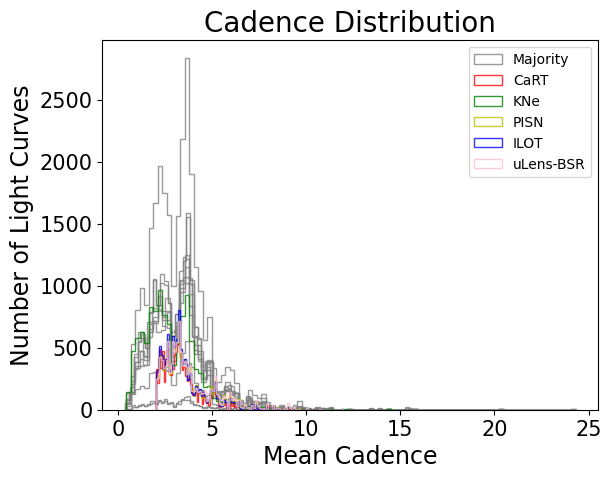

In [21]:
# plt.figure(figsize=(8, 8))
plt.style.use('default')
for ind in range(len(file_names)):
    class_num = file_names[ind]
    # print(colors[anom_classes.index(class_num)] if file_to_class[class_num] in anom_classes else 'gray')
    plt.hist(mean_cadences[ind], bins=100, label='Majority' if file_to_class[class_num] == 'SNIa' else file_to_class[class_num] if class_num in anom_classes else None, alpha=0.8, histtype='step', color = colors[anom_classes.index(class_num)] if class_num in anom_classes else 'gray')
    

plt.xlabel('Mean Cadence', fontsize=17)
plt.ylabel('Number of Light Curves', fontsize=17)
plt.legend()
# plt.xlim(0, 10)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title("Cadence Distribution", fontsize=20)

plt.savefig("Figures/cadencedist", bbox_inches='tight')


In [22]:
def plot_raw(class_):
    
    class_ind = file_names.index(class_to_file[class_])

    keys = list(full_data[class_ind].keys())
    key = None
    for i in range(len(keys)):
        key = keys[i]
        if full_data[class_ind][key].meta['redshift'] < 0.2:
            print(full_data[class_ind][key].meta['class_num'])
            full_data[class_ind][key] = full_data[class_ind][key][(full_data[class_ind][key]['time'] < 70) & (full_data[class_ind][key]['time'] > -30)]
                              
            plt.scatter(full_data[class_ind][key][full_data[class_ind][key]['passband'] == 'r']['time'], full_data[class_ind][key][full_data[class_ind][key]['passband'] == 'r']['flux'])
            plt.scatter(full_data[class_ind][key][full_data[class_ind][key]['passband'] == 'g']['time'], full_data[class_ind][key][full_data[class_ind][key]['passband'] == 'g']['flux'])
            plt.show()

In [ ]:
plot_raw('uLens-BSR')

In [ ]:
# Estimation of Mean

mx = 0
mn = 1e9

for ind, filename in enumerate(file_names): 

  data = full_data[ind]
  ids = list(data.keys())
  for id in ids[:10]:

    df = (pd.DataFrame(np.array(data[id])))

    print(np.max(df['flux'])/500, np.min(df['flux'])/500)


In [26]:
x_data = [] # shape => for each time step, store time, median passband wavelength, flux, flux error
host_galaxy_info = []
target = [] # store target class


In [27]:
import os

band_medians = {'r' : 0.4827, 'g' : 0.6223} # Median Wavelength (in Angstroms) Scaled over 10000 for ZTF


before = 30
after = 70

for ind, filename in enumerate(file_names):

  data = full_data[ind]

  ids = list(data.keys())

   
  for id in ids:
    # print(str(data[id].meta['class_num']), filename)
    # break
    # if (file_to_class[filename] == 'KNe'):
 
    df = data[id]
    df = pd.DataFrame(np.array(df))
    
    cur_meta = [data[id].meta['redshift'], data[id].meta['mwebv']] # host gal info, redshift and extinction

    df['flux'] = (df['flux']) / 500
    df['fluxErr'] = (df['fluxErr']) / 500

    trigger_mjd = 0

    df = df[(df['time'] > trigger_mjd - before) & (df['time'] < trigger_mjd + after)] # Scale Time

    
    if (len(df) == 0):
        continue

    df.sort_values("time", inplace=True)
    df.drop('photflag', axis=1, inplace=True)

    df.time = (df.time - (-before)) / (after + before)


    df['passband'] = df['passband'].map(band_medians)

    x_data.append(np.array(df))
    # print(data[id].meta['class_num'])
    target.append(filename)
    host_galaxy_info.append(cur_meta)
    # break
  print(ind)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [29]:
def save(file_name , obj):
    with open(file_name, 'wb') as f:
        pickle.dump(obj, f)

In [30]:

        
save("new_pre/target", target)
save("new_pre/x_data", x_data)
save("new_pre/host_galaxy_info", host_galaxy_info)

In [31]:
def load(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

target = load("new_pre/target")
x_data = load("new_pre/x_data")
host_galaxy_info = load("new_pre/host_galaxy_info")


In [32]:
valid = [False] * len(target)

for class_ in np.unique(target):
    cnt = 0
    for i in range(len(target)):
        
        if (target[i] == class_):
            valid[i] = True
            cnt+=1
        if (cnt == 13000): # cut down
            break

In [33]:
for i in range(len(target) - 1, -1, -1):
    if not valid[i]:
        del target[i]
        del x_data[i]
        del host_galaxy_info[i]

In [34]:
lengths = []

for lc in x_data:
    lengths.append(len(lc))

ntimesteps = np.max(lengths)

print(ntimesteps)

656


In [35]:
# Pad for TF masking layer
def dilate(vals, red):
    return ((((vals * 100) - 30) / (1 + red)) + 30) / 100 # unscale time then correct 


for ind in range(len(x_data)):
  x_data[ind][:, 1] = dilate(x_data[ind][:, 1], host_galaxy_info[ind][0])
  x_data[ind] = np.pad(x_data[ind], ((0, ntimesteps - len(x_data[ind])), (0, 0)))

In [38]:
# Split data

y_data_anom = []
y_data_norm = []
x_data_norm = []
x_data_anom = []
host_gal_anom = []
host_gal = []

for i in range(len(target)):

    if (target[i] in anom_classes):
        x_data_anom.append(x_data[i])
        y_data_anom.append(target[i])
        host_gal_anom.append(host_galaxy_info[i])

    else:
        x_data_norm.append(x_data[i])
        y_data_norm.append(target[i])
        host_gal.append(host_galaxy_info[i])



In [39]:
np.unique(target)

array(['lc_classnum_AGN_old.pickle', 'lc_classnum_CART_old.pickle',
       'lc_classnum_II.pickle', 'lc_classnum_IIb.pickle',
       'lc_classnum_IIn.pickle', 'lc_classnum_ILOT_old.pickle',
       'lc_classnum_Ia-91bg.pickle', 'lc_classnum_Ia.pickle',
       'lc_classnum_Iax.pickle', 'lc_classnum_Ib.pickle',
       'lc_classnum_Ic-BL.pickle', 'lc_classnum_Ic.pickle',
       'lc_classnum_Kilonova.pickle', 'lc_classnum_PISN_old.pickle',
       'lc_classnum_SLSN-I.pickle', 'lc_classnum_TDE.pickle',
       'lc_classnum_uLens-BSR.pickle'], dtype='<U28')

In [40]:
# One-hot Encoding

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

y_data_norm = enc.fit_transform(np.array(y_data_norm).reshape(-1, 1)).todense()

In [41]:
# Train-test split

X_train, X_test, host_gal_train, host_gal_test, y_train, y_test = train_test_split(x_data_norm, host_gal, y_data_norm, random_state = 40, test_size = 0.1)


In [42]:
X_train, X_val, host_gal_train, host_gal_val, y_train, y_val = train_test_split(X_train, host_gal_train, y_train, random_state = 40, test_size = 1/9)

In [43]:
class_weights = {i : 0 for i in range(y_train.shape[1])}

for value in y_train:
  class_weights[np.argmax(value)]+=1

for id in class_weights.keys():
  class_weights[id] = len(y_train) / class_weights[id]


In [44]:
ntimesteps

656

In [64]:
# NOT USED IN WORK (SKIP)

delete = 0

def sigma_clip(data, lo, hi):
    global delete
    for ind in range(len(data)):
        data[ind] = list(data[ind])
        for j in range(len(data[ind]) - 1, -1, -1):
            if (data[ind][j][2] > hi or data[ind][j][2] < lo):
                del data[ind][j]
                delete += 1

for i in range(3):
    obs = []
    
    for ind in range(len(X_train)):
        for j in X_train[ind]:
            obs.append(j[2])
            
    mean = np.mean(obs)
    std = np.std(obs)
    
    lo = mean - 3*std
    hi = mean + 3*std
    
    sigma_clip(X_train, lo, hi)
    sigma_clip(X_test, lo, hi)
    sigma_clip(X_val, lo, hi)
    sigma_clip(x_data_anom, lo, hi)
    
    print(delete)
        
    # X_train = X_train[(X_train[:, 2] > lo) & (X_train[:][2] < up)]
    # X_val = X_val[(X_train[:, 2] > lo) & (X_val[:, 2] < up)]
    # X_test[(X_test[:, 2] > lo) & (X_test[:, 2] < up)]
    # x_data_anom[(x_data_anom[:, 2] > lo) & (x_data_anom[:, 2] < up)]

65932
239924
402786


In [ ]:
# NOT USED IN WORK (SKIP)

X_train = list(X_train)
y_train = list(y_train)
host_gal_train = list(host_gal_train)

for ind in range(len(X_train)-1, -1, -1):
    if len(X_train[ind]) == 0:
        del X_train[ind]
        del host_gal_train[ind]
        del y_train[ind]



    else:    
        X_train[ind] = np.pad(X_train[ind], ((0, ntimesteps - len(X_train[ind])), (0, 0)))

        
X_val = list(X_val)
y_val = list(y_val)
host_gal_val = list(host_gal_val)

for ind in range(len(X_val)-1, -1, -1):
    if len(X_val[ind]) == 0:
        del X_val[ind]
        del host_gal_val[ind]
        del y_val[ind]



    else:    
        X_val[ind] = np.pad(X_val[ind], ((0, ntimesteps - len(X_val[ind])), (0, 0)))

        

X_test = list(X_test)
y_test = list(y_test)
host_gal_test = list(host_gal_test)

for ind in range(len(X_test)-1, -1, -1):
    if len(X_test[ind]) == 0:
        del X_test[ind]
        del host_gal_test[ind]
        del y_test[ind]



    else:    
        X_test[ind] = np.pad(X_test[ind], ((0, ntimesteps - len(X_test[ind])), (0, 0)))

        
x_data_anom = list(x_data_anom)
y_data_anom = list(y_data_anom)
host_gal_anom = list(host_gal_anom)

for ind in range(len(x_data_anom)-1, -1, -1):
    if len(x_data_anom[ind]) == 0:
        del x_data_anom[ind]
        del host_gal_anom[ind]
        del y_data_anom[ind]



    else:    
        x_data_anom[ind] = np.pad(x_data_anom[ind], ((0, ntimesteps - len(x_data_anom[ind])), (0, 0)))


In [45]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

host_gal_train = np.array(host_gal_train)
host_gal_test = np.array(host_gal_test)
host_gal_val = np.array(host_gal_val)

y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)
y_test = np.squeeze(y_test)
y_data_anom = np.squeeze(y_data_anom)

In [46]:
X_train.shape

(95182, 656, 4)

In [47]:
dummy = enc.transform(np.array(non_anom_classes).reshape(-1, 1))

ordered_class_names = [-1 for i in range(len(non_anom_classes))]


for ind, i in enumerate(dummy.todense()):
    ordered_class_names[np.argmax(i)] = file_to_class[non_anom_classes[ind]]

In [48]:
np.unique(target)

array(['lc_classnum_AGN_old.pickle', 'lc_classnum_CART_old.pickle',
       'lc_classnum_II.pickle', 'lc_classnum_IIb.pickle',
       'lc_classnum_IIn.pickle', 'lc_classnum_ILOT_old.pickle',
       'lc_classnum_Ia-91bg.pickle', 'lc_classnum_Ia.pickle',
       'lc_classnum_Iax.pickle', 'lc_classnum_Ib.pickle',
       'lc_classnum_Ic-BL.pickle', 'lc_classnum_Ic.pickle',
       'lc_classnum_Kilonova.pickle', 'lc_classnum_PISN_old.pickle',
       'lc_classnum_SLSN-I.pickle', 'lc_classnum_TDE.pickle',
       'lc_classnum_uLens-BSR.pickle'], dtype='<U28')

In [49]:
non_anom_classes

['lc_classnum_Ia.pickle',
 'lc_classnum_Ia-91bg.pickle',
 'lc_classnum_Iax.pickle',
 'lc_classnum_Ib.pickle',
 'lc_classnum_Ic.pickle',
 'lc_classnum_Ic-BL.pickle',
 'lc_classnum_II.pickle',
 'lc_classnum_IIn.pickle',
 'lc_classnum_IIb.pickle',
 'lc_classnum_TDE.pickle',
 'lc_classnum_SLSN-I.pickle',
 'lc_classnum_AGN_old.pickle']

In [50]:
np.unique(y_data_anom)

array(['lc_classnum_CART_old.pickle', 'lc_classnum_ILOT_old.pickle',
       'lc_classnum_Kilonova.pickle', 'lc_classnum_PISN_old.pickle',
       'lc_classnum_uLens-BSR.pickle'], dtype='<U28')

In [51]:
train_counts = {i : 0 for i in file_to_class.values()}

for i in y_train:
    train_counts[ordered_class_names[np.argmax(i)]] += 1
    
val_counts = {i : 0 for i in file_to_class.values()}

for i in y_val:
    val_counts[ordered_class_names[np.argmax(i)]] += 1
    
test_counts = {i : 0 for i in file_to_class.values()}

for i in y_test:
    test_counts[ordered_class_names[np.argmax(i)]] += 1

In [52]:


for i in y_data_anom:
    test_counts[file_to_class[i]] += 1

In [53]:
full_data = {i: [] for i in reversed(file_to_class.values())}

for i in train_counts.keys():
    full_data[i].append(train_counts[i])
    
for i in val_counts.keys():
    full_data[i].append(val_counts[i])
    
for i in test_counts.keys():
    full_data[i].append(test_counts[i])

In [54]:
for key, value in reversed(full_data.items()):
    print(f"{key} & {value[0]} & {value[1]} & {value[2]} & {value[1] + value[0] + value[2]} \\\\")
    print("\hline")




SNIa & 9314 & 1131 & 1142 & 11587 \\
\hline
SNIa-91bg & 10361 & 1318 & 1321 & 13000 \\
\hline
SNIax & 10413 & 1248 & 1339 & 13000 \\
\hline
SNIb & 4197 & 507 & 563 & 5267 \\
\hline
SNIc & 1279 & 169 & 135 & 1583 \\
\hline
SNIc-BL & 1157 & 124 & 142 & 1423 \\
\hline
SNII & 10420 & 1279 & 1301 & 13000 \\
\hline
SNIIn & 10323 & 1359 & 1318 & 13000 \\
\hline
SNIIb & 9882 & 1233 & 1208 & 12323 \\
\hline
TDE & 9078 & 1162 & 1114 & 11354 \\
\hline
SLSN-I & 10285 & 1322 & 1273 & 12880 \\
\hline
AGN & 8473 & 1046 & 1042 & 10561 \\
\hline
CaRT & 0 & 0 & 10353 & 10353 \\
\hline
KNe & 0 & 0 & 11166 & 11166 \\
\hline
PISN & 0 & 0 & 10840 & 10840 \\
\hline
ILOT & 0 & 0 & 11128 & 11128 \\
\hline
uLens-BSR & 0 & 0 & 11244 & 11244 \\
\hline


In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, TimeDistributed, Dense, Masking, concatenate, GRU
from tensorflow.keras.callbacks import EarlyStopping
from math import dist

def create_no_redshift(latent_size):

    num_classes = len(class_weights)
    n_features = 4

    input_1 = Input((ntimesteps, n_features), name='lc')  # X.shape = (Nobjects, Ntimesteps, 4)

    masking_input1 = Masking(mask_value=0.)(input_1)

    lstm1 = GRU(100, return_sequences=True, activation='tanh')(masking_input1)
    lstm2 = GRU(100, return_sequences=False, activation='tanh')(lstm1)

    dense1 = Dense(100, activation='tanh')(lstm2)

    input_2 = Input(shape = (1, ), name='host')

    dense2 = Dense(5)(input_2)

    merge1 = concatenate([dense1, dense2])

    dense3 = Dense(100, activation='relu')(merge1)

    dense4 = Dense(latent_size, activation='relu', name='latent')(dense3)

    output = Dense(num_classes, activation='softmax')(dense4)

    model = keras.Model(inputs=[input_1, input_2], outputs=output)

    model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    return model

def create_redshift(latent_size):

    num_classes = len(class_weights)
    n_features = 4

    input_1 = Input((ntimesteps, n_features), name='lc')  # X.shape = (Nobjects, Ntimesteps, 4)

    masking_input1 = Masking(mask_value=0.)(input_1)

    lstm1 = GRU(100, return_sequences=True, activation='tanh')(masking_input1)
    lstm2 = GRU(100, return_sequences=False, activation='tanh')(lstm1)

    dense1 = Dense(100, activation='tanh')(lstm2)

    input_2 = Input(shape = (2, ), name='host')

    dense2 = Dense(10)(input_2)

    merge1 = concatenate([dense1, dense2])

    dense3 = Dense(100, activation='relu')(merge1)

    dense4 = Dense(latent_size, activation='relu', name='latent')(dense3)

    output = Dense(num_classes, activation='softmax')(dense4)

    model = keras.Model(inputs=[input_1, input_2], outputs=output)

    model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    return model

In [56]:
from tensorflow.keras import Model
from sklearn.ensemble import IsolationForest
class Trained_Model:
    def __init__(self, size, redshift):
        
        self.size = size
        self.redshift = redshift
            
        
        
        
    def load_model(self, path):
        ins = 'No' if not self.redshift else ''
        self.model=keras.models.load_model(f'Models/{path}')
        self.latent_model = Model(inputs=[self.model.get_layer('lc').input, self.model.get_layer('host').input], outputs=self.model.get_layer('latent').output)
        
        
    def _train_latent(self):
        print(self.host_gal_train.shape)
        self.train_latent = self.latent_model.predict([self.X_train, self.host_gal_train])
        
    def _test_latent(self):
        self.test_latent = self.latent_model.predict([self.X_test, self.host_gal_test])
        
    def _val_latent(self):
        self.val_latent = self.latent_model.predict([self.X_val, self.host_gal_val])
        
    def _anom_latent(self):
        self.anom_latent = self.latent_model.predict([self.X_anom, self.host_gal_anom])
    
    def initialize_mcif(self):

        self.iso_forests = []
        

        full_latent_data = [[] for i in range(12)]

        for i in range(len(self.train_latent)):
            full_latent_data[np.argmax(y_train[i])].append(self.train_latent[i])
            
        for i in range(len(self.val_latent)):
            full_latent_data[np.argmax(y_val[i])].append(self.val_latent[i])


        for i in range(12):
            self.iso_forests.append(IsolationForest(random_state=0, max_samples = 'auto', n_estimators=200).fit(np.array(full_latent_data[i])))

        # self.iso_forests.append(iso_forests)
        
        
    def score(self, x_data):
        scores = [-det.decision_function(x_data) for det in self.iso_forests]

        scores = np.array(scores)
        scores = scores.T
        return [np.min(i) for i in scores]
    
    def score_val(self):
        self.val_scores = self.score(self.val_latent)
        
    def score_test(self):
        self.test_scores = self.score(self.test_latent)
        
    def score_anom(self):
        self.anom_scores = self.score(self.anom_latent)
        
    def score_train(self):
        self.train_scores = self.score(self.train_latent)
            
        

In [57]:
model = create_redshift(9)

early_stopping = EarlyStopping(
                              patience=5,
                              min_delta=0.001,                               
                              monitor="val_loss",
                              restore_best_weights=True
                              )



try:
    history = model.fit(x = [X_train, host_gal_train], validation_data=([X_val, host_gal_val], y_val), y = y_train, epochs=40, batch_size = 128, class_weight = class_weights, callbacks=[early_stopping])
except Exception as e:
    print(e)
    pass

2024-01-28 20:49:53.416143: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-28 20:49:54.816669: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-28 20:49:54.817040: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/40


2024-01-28 20:50:09.598061: W tensorflow/core/common_runtime/type_inference.cc:339] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT8
    }
  }
}

	for Tuple type infernce function 0
	while inferring type of node 'cond_41/output/_22'
2024-01-28 20:50:10.056275: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-01-28 20:50:11.712430: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb39a697480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-28 20:5

744/744 [==============================] - 41s 36ms/step - loss: 21.0077 - accuracy: 0.4124 - val_loss: 1.2612 - val_accuracy: 0.5672
Epoch 2/40
744/744 [==============================] - 23s 31ms/step - loss: 14.7401 - accuracy: 0.6003 - val_loss: 1.0367 - val_accuracy: 0.6387
Epoch 3/40
744/744 [==============================] - 23s 31ms/step - loss: 12.2759 - accuracy: 0.6667 - val_loss: 0.8082 - val_accuracy: 0.7143
Epoch 4/40
744/744 [==============================] - 23s 31ms/step - loss: 10.7373 - accuracy: 0.7099 - val_loss: 0.7472 - val_accuracy: 0.7370
Epoch 5/40
744/744 [==============================] - 23s 31ms/step - loss: 9.6975 - accuracy: 0.7417 - val_loss: 0.6494 - val_accuracy: 0.7699
Epoch 6/40
744/744 [==============================] - 23s 31ms/step - loss: 8.8788 - accuracy: 0.7644 - val_loss: 0.6436 - val_accuracy: 0.7643
Epoch 7/40
744/744 [==============================] - 23s 31ms/step - loss: 8.4094 - accuracy: 0.7785 - val_loss: 0.6390 - val_accuracy: 0.7683

In [58]:
latent_size=9
model.save(f"Models/RedshiftLatent_{latent_size}FinalTest")
save(f"Models/RedshiftLatent_{latent_size}_historyFinalTest", history)

INFO:tensorflow:Assets written to: Models/RedshiftLatent_9FinalTest/assets


INFO:tensorflow:Assets written to: Models/RedshiftLatent_9FinalTest/assets


In [59]:
best = (Trained_Model(9, True))

In [60]:
x_data_anom = np.array(x_data_anom)
host_gal_anom = np.array(host_gal_anom)

In [63]:

# test = load("FinalRedshiftModel")
best.load_model(f"RedshiftLatent_{latent_size}FinalTest")
best.train_latent = best.latent_model.predict([X_train, host_gal_train])
best.val_latent = best.latent_model.predict([X_val, host_gal_val])
best.initialize_mcif()
best.anom_latent = best.latent_model.predict([x_data_anom, host_gal_anom])

best.score_anom()
best.score_val()

best.test_predictions = best.model.predict([X_test, host_gal_test])

2024-01-28 21:41:10.149775: W tensorflow/core/common_runtime/graph_constructor.cc:834] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2024-01-28 21:41:10.917856: W tensorflow/core/common_runtime/graph_constructor.cc:834] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2024-01-28 21:41:11.583634: W tensorflow/core/common_runtime/graph_constructor.cc:834] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2024-01-28 21:41:11.596090: W tensorflow/core/common_runtime/graph_constructor.cc:834] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.


372/372 [==============================] - 6s 8ms/step


In [64]:
best.test_latent = best.latent_model.predict([X_test, host_gal_test])
best.score_test()

372/372 [==============================] - 3s 8ms/step


In [68]:
non_anom_order = [ordered_class_names.index(file_to_class[i]) for i in non_anom_classes]

In [76]:
def to_order(output):
    return file_names.index(class_to_file[ordered_class_names[np.argmax(output)]])


def saveplot(savepath):
    if (savepath):
        if ("UMAP" not in savepath):
            plt.savefig(savepath + '.pdf', bbox_inches='tight')
        else:
            plt.savefig(savepath + '.png', bbox_inches='tight')

def average_score(scores_maj, y_data_maj, scores_anom, y_data_anom, title="", savepath=None):
    total_counts = {i : 0 for i in file_to_class.values()}
    average_score = {i : 0 for i in file_to_class.values()}


    for i in range(len(y_data_maj)):

        total_counts[file_to_class[file_names[to_order(y_data_maj[i])]]] += 1
        average_score[file_to_class[file_names[to_order(y_data_maj[i])]]] += scores_maj[i]

    for i in range(len(y_data_anom)):
        total_counts[file_to_class[y_data_anom[i]]] += 1
        average_score[file_to_class[y_data_anom[i]]] += scores_anom[i] # anomaly score is the minimum

    for key in total_counts.keys():
        if (total_counts[key] == 0):
            continue
        average_score[key] /= total_counts[key]

    fig, ax = plt.subplots(figsize=(13, 13))
    
    averages = list(average_score.values())

    cmap = matplotlib.cm.Blues(np.linspace(0,1,100))
    cmap = matplotlib.colors.ListedColormap(cmap[25:75,:-1])

    im = ax.imshow([averages], cmap=cmap)

    ax.set_yticks([])
    ax.set_xticks(range(len(averages)), list(average_score.keys()), fontsize=15, rotation=45)
    for x in range(len(averages)):
      ax.annotate(str(round(averages[x], 2)), xy=(x, 0),
                  horizontalalignment='center',
                  verticalalignment='center', fontsize=15, fontweight = "bold" if (x > 11) else "normal")
    ax.set_title(title, fontsize=20)
    saveplot(savepath)

    
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(predictions, labels, savepath=None):
    
    single_pred = np.array([to_order(i) for i in predictions])
    single_test = np.array([to_order(i) for i in labels])

    cm = confusion_matrix(single_test, single_pred, labels = range(len(non_anom_classes)), normalize='true')

    disp = ConfusionMatrixDisplay(confusion_matrix=np.round(cm, 2), display_labels=[file_to_class[i] for i in non_anom_classes])

    disp.plot(cmap=plt.cm.Blues)

    fig = disp.figure_


    disp.im_.colorbar.remove()

    fig.set_figwidth(10)
    fig.set_figheight(10)

    plt.xticks(rotation=90)

    plt.xlabel("True Class", fontsize=22)
    plt.ylabel("Predicted Class", fontsize=22)
    plt.title("Confusion Matrix on Full Time Series", fontsize=27)
    
    saveplot(savepath)

    
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score


def plot_roc_curve(predictions, labels, savepath=None):
    

    single_test = np.array([np.argmax(i) for i in labels])
    plt.figure(figsize=(10, 10))

    auc = roc_auc_score(np.array(labels), np.array(predictions), multi_class='ovr', average=None)
    non_anom_labels = [file_to_class[i] for i in non_anom_classes]
    for i in non_anom_order:
      fpr, tpr, _ = roc_curve(y_true = single_test, y_score = predictions[:, i], pos_label = i)
      plt.plot(fpr, tpr, label = ordered_class_names[i] + f" ({round(auc[i], 2)})", color=colors[i])

    plt.legend(loc=0, fontsize=20)

    plt.title("ROC Curve for Full Light Curve", fontsize=25)
    plt.xlabel("True Positive Rate", fontsize=20)
    plt.ylabel("False Positive Rate", fontsize=20)

    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    
    
    saveplot(savepath)

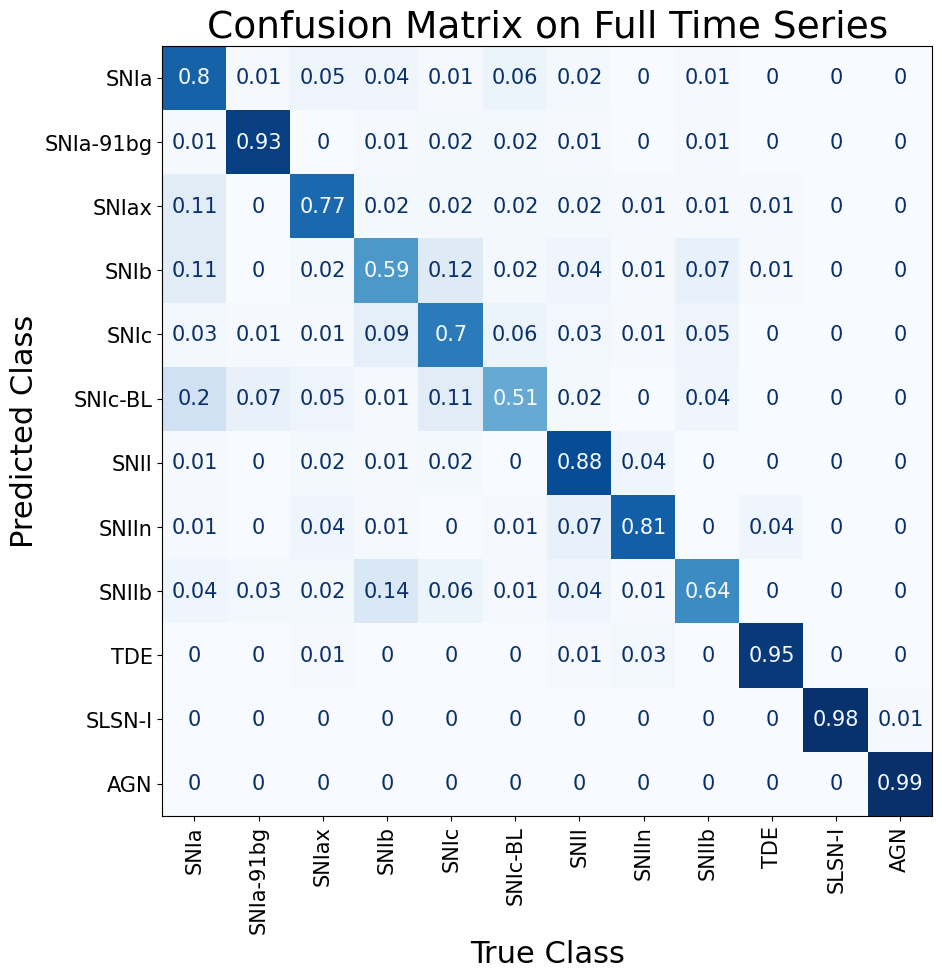

In [72]:
plot_confusion_matrix(best.test_predictions, y_test, savepath='FiguresNew/ConfusionMatrix')

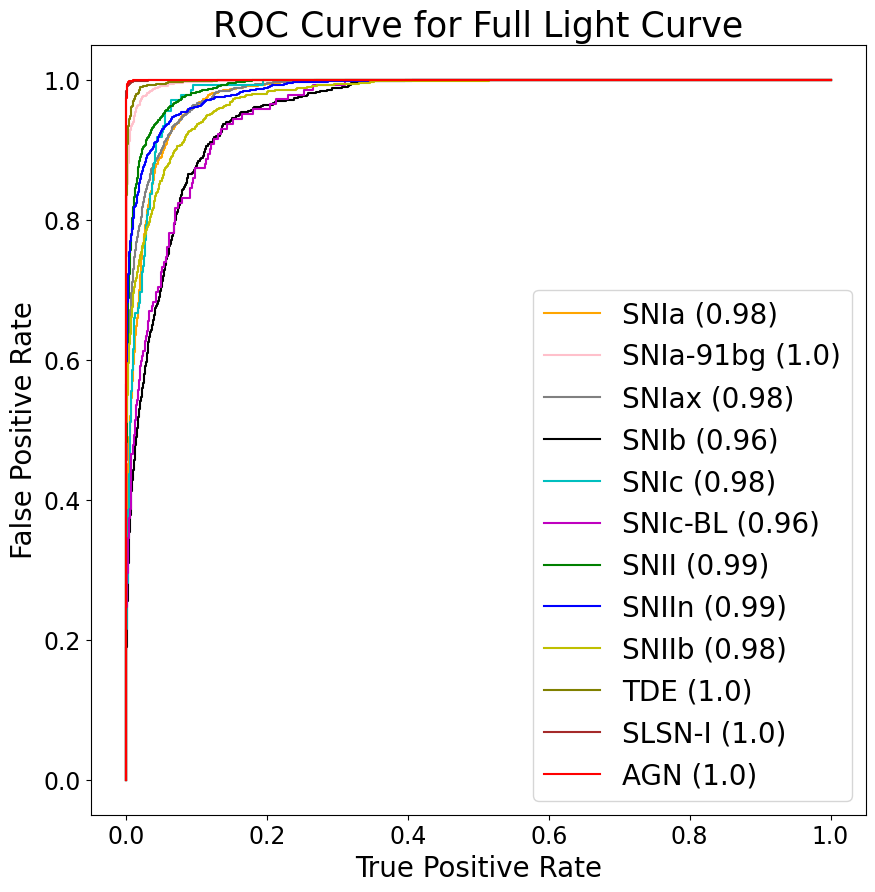

In [77]:
plot_roc_curve(best.test_predictions, y_test, savepath='FiguresNew/ROCCurve')

In [78]:
from sklearn.metrics import auc

def get_pr(minority, majority):

    precision = []
    recall = []
    thresholds = []
    minority=np.array(minority)
    majority=np.array(majority)
    for threshold in np.arange(min(np.min(minority),np.min(majority)), max(np.max(minority),np.max(majority)) + 0.002, 0.001):
        ta = np.count_nonzero(minority > threshold)
        fa = np.count_nonzero(majority > threshold)
        tn = np.count_nonzero(majority < threshold)
        fn = np.count_nonzero(minority < threshold)
        if fn == 0 or fa == 0:
          continue
        if (ta + fa == 0):
            continue
        recall.append(ta / (ta + fn))
        precision.append(ta / (ta + fa))
        thresholds.append(threshold)
    return thresholds, precision, recall

def get_pr_auc(scores_maj, y_data_maj, scores_anom, y_data_anom):
    np.random.seed(60)
    
    aucs = {}
    
    for ind, i in enumerate(non_anom_classes):
        
        mult_iso_maj_class = [scores_maj[t] for t in range(len(scores_maj)) if non_anom_classes[np.argmax(y_data_maj[t])] == i]

        mult_iso_min_cur = np.random.choice(scores_anom, int(len(mult_iso_maj_class)), p=p_anom)

        thresholds, precision, recall = get_pr(mult_iso_maj_class, mult_iso_min_cur)

        aucs[file_to_class[i]] = auc(recall, precision)


    for ind, i in enumerate(anom_classes):
        mult_iso_min_class = [scores_anom[t] for t in range(len(y_data_anom)) if y_data_anom[t] == i] # all anomalies of current class (i)

        mult_iso_min_class = np.random.choice(mult_iso_min_class, int(min(len(scores_maj), len(mult_iso_min_class))))

        thresholds, precision, recall = get_pr(mult_iso_min_class, scores_maj)

        aucs[file_to_class[i]] = auc(recall, precision)

        
    return aucs

In [80]:
import matplotlib.gridspec as gridspec

class_weights_anom = {i: 0 for i in anom_classes}

for i in y_data_anom:
  class_weights_anom[i]+=1

print(class_weights_anom)
for i in list(class_weights_anom.keys()):
  class_weights_anom[i] = len(y_data_anom) / class_weights_anom[i]


p_anom = [class_weights_anom[i] for i in y_data_anom]

sum = np.sum(p_anom)

for i in range(len(p_anom)):
  p_anom[i] /= sum

def plot_pr_anom(scores_maj, y_data_maj, scores_anom, y_data_anom, s=None):
    
    fig = plt.figure(figsize=(18, 12))
    gs = gridspec.GridSpec(2, 3, width_ratios=[1,2,0], height_ratios=[1,1])

    ax3 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0], sharex=ax3)
    ax = fig.add_subplot(gs[:, 1:3])

    ax.set_aspect('equal', 'box')
    
    plt.ylim((0, 1))
    plt.xlim((0, 1))

    for ind, i in enumerate(anom_classes):
        mult_iso_min_class = [scores_anom[t] for t in range(len(scores_anom)) if y_data_anom[t] == i] # all anomalies of current class (i)

        mult_iso_min_class = np.random.choice(mult_iso_min_class, int(min(len(scores_maj), len(mult_iso_min_class))))

        thresholds, precision, recall = get_pr(mult_iso_min_class, scores_maj)

        ax.plot(recall, precision, label=f"{file_to_class[i]} ({round(auc(recall, precision), 2)})", c = color[ind])

        ax2.plot(thresholds, recall, label=f"{file_to_class[i]}", c = color[ind])

        ax3.plot(thresholds, precision, label=f"{file_to_class[i]}", c = color[ind])

    # ax3.set_xlim(-0.13, 0.2)
    # ax2.set_ylim(0, 0.2)

    ax.set_ylabel("Precision", fontsize=22)
    ax.set_xlabel("Recall", fontsize=22)
    ax.legend(fontsize=18)

    ax2.set_ylabel("Recall", fontsize=22)
    ax2.set_xlabel("Threshold", fontsize=22)
    # ax2.legend(fontsize=15)

    ax3.set_ylabel("Precision", fontsize=22)
    ax3.set_xlabel("Threshold", fontsize=22)
    # ax3.legend(fontsize=15)

    fig.suptitle("Anomaly Precision-Recall Curve for Anomalous Classes", fontsize=30)



    # plt.savefig(f"{figpath}/PRAnomClassTesting.pdf", bbox_inches='tight')
    saveplot(s)

def plot_pr_maj(scores_maj, y_data_maj, scores_anom, y_data_anom, s=None):
    fig = plt.figure(figsize=(18, 12))
    gs = gridspec.GridSpec(2, 3, width_ratios=[1,2,0], height_ratios=[1,1])

    ax3 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0], sharex=ax3)
    ax = fig.add_subplot(gs[:, 1:3])

    ax.set_aspect('equal', 'box')


    plt.ylim((0, 1))
    plt.xlim((0, 1))

    for ind, i in enumerate(non_anom_classes):

        mult_iso_maj_class = [scores_maj[t] for t in range(len(scores_maj)) if class_to_file[ordered_class_names[np.argmax(y_test[t])]] == i]

        mult_iso_min_cur = np.random.choice(scores_anom, int(len(mult_iso_maj_class)), p=p_anom)

        thresholds, precision, recall = get_pr(mult_iso_maj_class, mult_iso_min_cur)

        cur_c = color[ordered_class_names.index(file_to_class[i])]
        
        ax.plot(recall, precision, label=f"{file_to_class[i]} ({round(auc(recall, precision), 2)})", c = cur_c)

        ax2.plot(thresholds, recall, label=f"{file_to_class[i]}", c = cur_c)

        ax3.plot(thresholds, precision, label=f"{file_to_class[i]}", c = cur_c)

    # ax3.set_xlim(-0.13, 0.17)
    # ax.set_xlim(0, 1)
    # ax.set_xlim(0, 0.2)

    ax.set_ylabel("Precision", fontsize=22)
    ax.set_xlabel("Recall", fontsize=22)
    ax.legend(fontsize=18)

    ax2.set_ylabel("Recall", fontsize=22)
    ax2.set_xlabel("Threshold", fontsize=22)
    # ax2.legend(fontsize=15)

    ax3.set_ylabel("Precision", fontsize=22)
    ax3.set_xlabel("Threshold", fontsize=22)
    # ax3.legend(fontsize=15)

    fig.suptitle("Anomaly Precision-Recall Curve for Majority Classes", fontsize=30)
   
    saveplot(s)


{'lc_classnum_CART_old.pickle': 10353, 'lc_classnum_Kilonova.pickle': 11166, 'lc_classnum_PISN_old.pickle': 10840, 'lc_classnum_ILOT_old.pickle': 11128, 'lc_classnum_uLens-BSR.pickle': 11244}


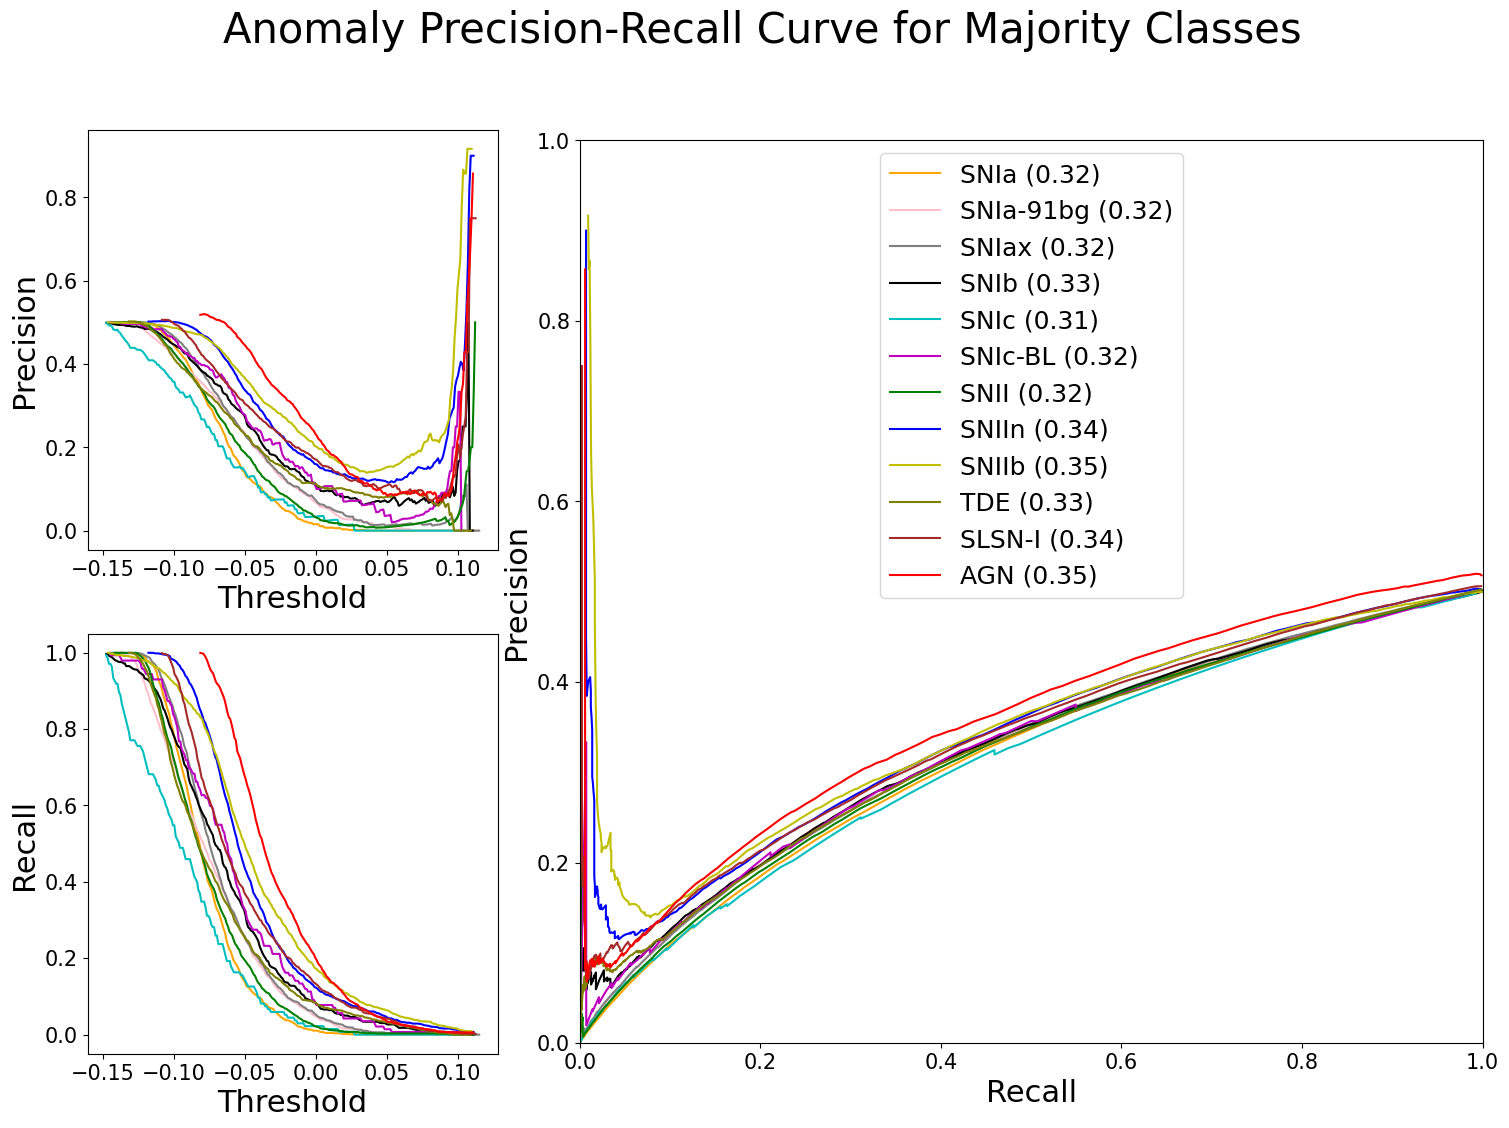

In [81]:
plot_pr_maj(best.test_scores, y_test, best.anom_scores, y_data_anom, s="FiguresNew/PRMaj")

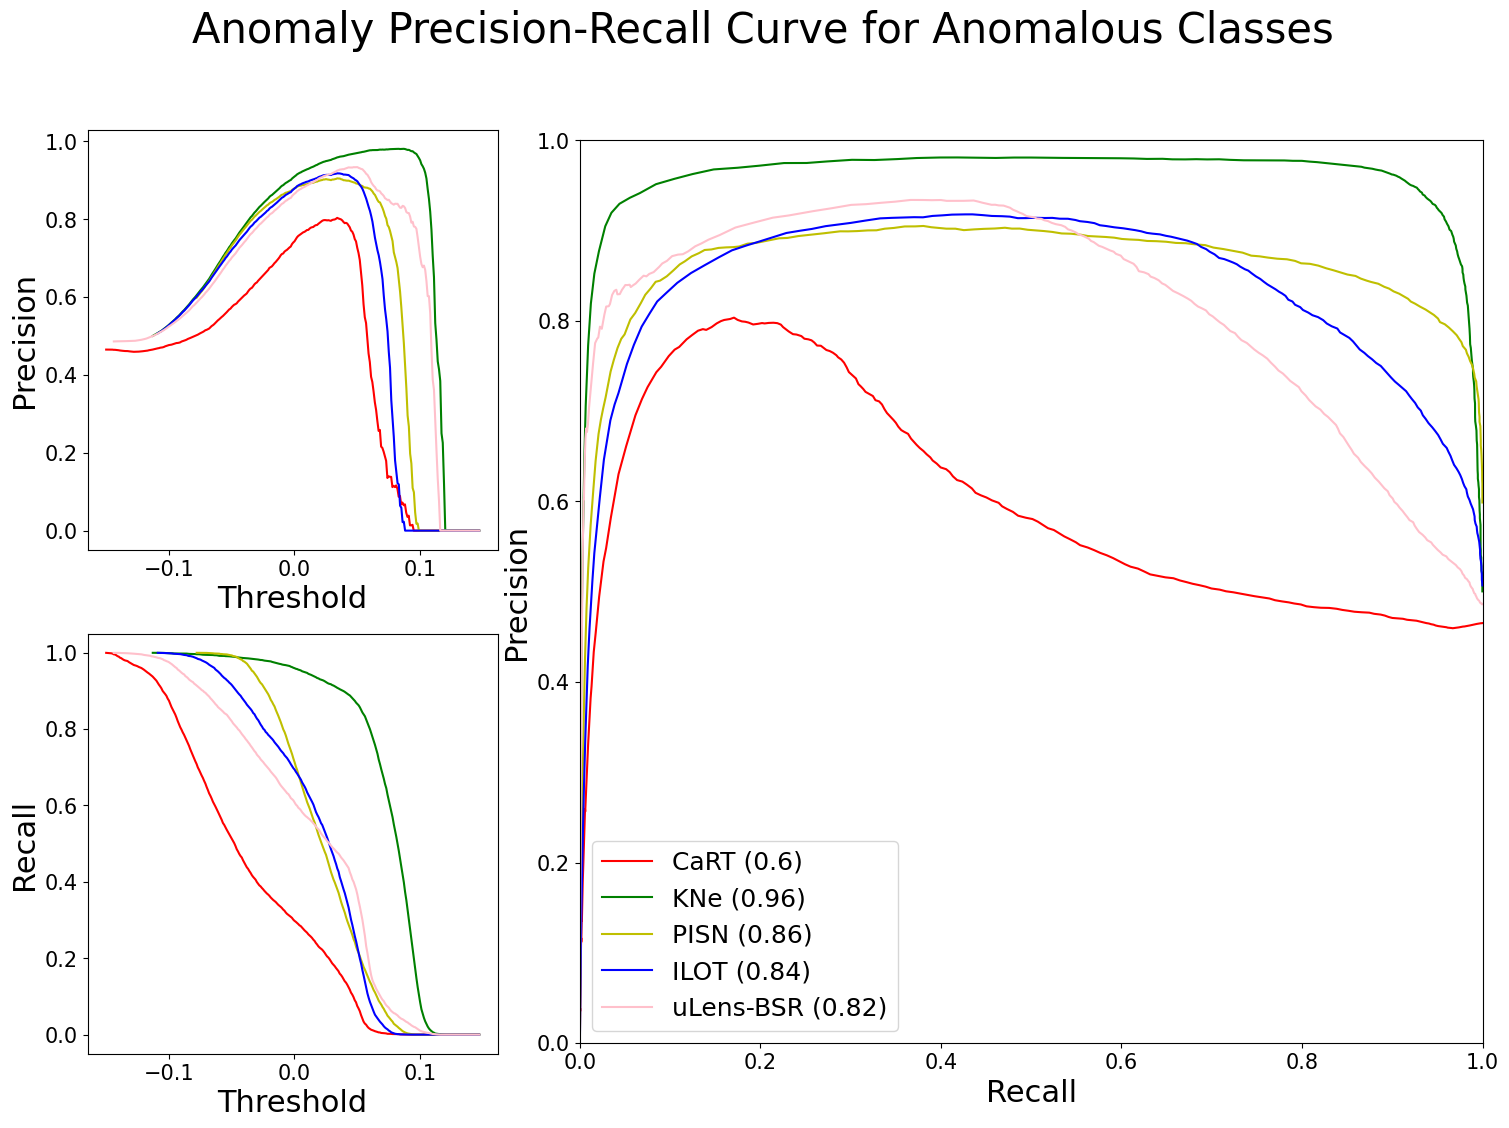

In [82]:
plot_pr_anom(best.test_scores, y_test, best.anom_scores, y_data_anom, s="FiguresNew/PRAnom")

In [83]:
file_to_index = {x: list(file_to_class.values()).index(x) for x in file_to_class.values()}

In [212]:
import seaborn as sns


def plot_dist(scores_maj, y_data_maj, scores_anom, y_data_anom, title = 'Distribution of Anomaly Scores\n Supervised Isolation Forests', savepath=None):
    color = ['#ADD8E6'] * 12 + ['#FF6645'] * 5
    
    x=[]
    g=[]

    for i in range(len(scores_maj)):
        g.append(ordered_class_names[np.argmax(y_data_maj[i])])
        x.append(scores_maj[i])

    for i in range(len(scores_anom)):
        g.append(file_to_class[y_data_anom[i]])
        x.append(scores_anom[i])

    df = pd.DataFrame(dict(x=x, g=g))

    df.sort_values('g', inplace=True, key=lambda x: x.map(file_to_index))
    

    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    # Initialize the FacetGrid object
    # pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=color)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x",
          bw_adjust=.5, clip_on=False,
          fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

    # passing color=None to refline() uses the hue mapping, but we do color = 'blue'
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)


    g.map(label, "x")

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.set(xlabel="Anomaly Score")

    g.despine(bottom=True, left=True)
    g.fig.suptitle(title, fontsize=23)

    if (savepath):
        g.figure.savefig(f"{savepath}.pdf", bbox_inches='tight')

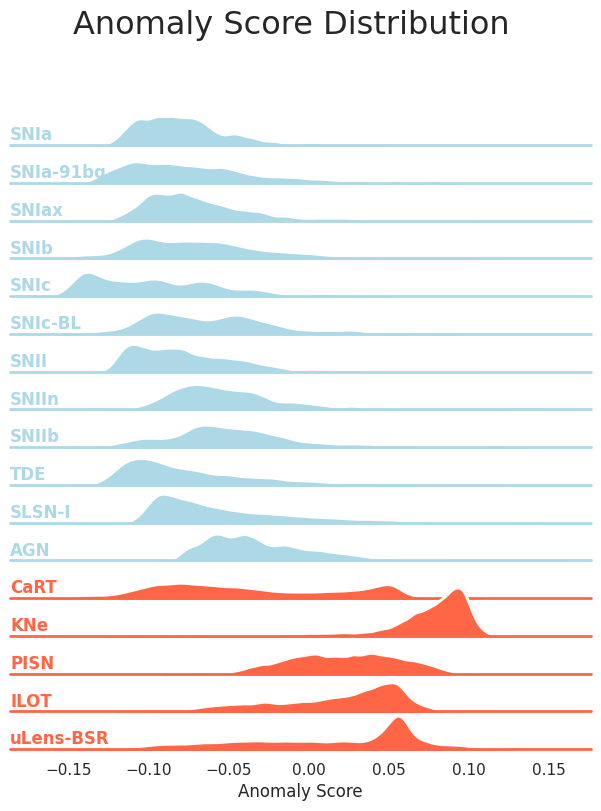

In [213]:
plot_dist(best.val_scores, y_val, best.anom_scores, y_data_anom, title=f"Anomaly Score Distribution", savepath=f'FiguresNew/Distribution')

In [175]:
color_from_class = {file_to_class[i] : color[ordered_class_names.index(file_to_class[i])] for i in non_anom_classes}
for ind, i in enumerate(anom_classes):
    color_from_class[file_to_class[i]] = color[ind]
    color_from_class[i] = color[ind]

def plot_recall(majority, minority, s=None, seed=60): # USE DEFAULT SEED!
    np.random.seed(seed)

    k = 20

    pref_counts = {}
    
    for key in ['All'] + anom_classes:
        pref_counts[key] = []
    
    
    rigged_p_anom = p_anom.copy()

    # for i in range(len(p_anom)):
    #     if y_data_anom[i] == class_to_file['CaRT']:
    #         rigged_p_anom[i] = 0

    sm = np.sum(rigged_p_anom)
    for i in range(len(rigged_p_anom)):
        rigged_p_anom[i] /= sm
    

    for _ in range(k):

      random_sample_maj = majority
   
        
      min_mask = np.random.choice(range(len(minority)), int(len(majority)/220), p = rigged_p_anom)
      random_sample_min = np.array(minority)[min_mask]
      min_classes = np.array(y_data_anom)[min_mask]
        
      print(len(random_sample_maj), len(random_sample_min))

      full_sample = [(i, 0) for i in random_sample_maj] + [(i, min_classes[ind]) for ind, i in enumerate((random_sample_min))]
      full_sample = list(reversed(sorted(full_sample)))

      pref_sample = {i : [0] for i in anom_classes}
      pref_sample['All'] = [0]
      for i in full_sample:
        pref_sample['All'].append(pref_sample['All'][-1] + (i[1] != 0))
        
        for key in anom_classes:
           pref_sample[key].append(pref_sample[key][-1] + (i[1] == key))
            
        
      for key in pref_sample.keys():
          pref_counts[key].append(pref_sample[key])
            
    final = []
            
    for key, value in pref_counts.items():
      med = []
      dev = []
        
        
      pref_counts = np.array(value).T

      for i in range(len(pref_counts)):
        pref_counts[i] = np.array(pref_counts[i])

        med.append(np.mean(pref_counts[i]))
        dev.append(np.std(pref_counts[i]))


      recall = np.array(med)/int(len(majority)/220)
      med=np.array(med)
      dev = np.array(dev)
    
      final.append([med, dev, key])

    font = {'size'   : 17}

    matplotlib.rc('font', **font)
    
    fig, ax = plt.subplots()

    

    ax.set_xlim(0, 2000)
    ax.set_xlabel("Index (Top 2000 Scores)", fontsize=18)
    ax.set_ylabel("Recall", fontsize=18)

    ax.set_title("Anomalies Detected by Index", fontsize=21)

    ax2 = ax.twinx()

    ax2.set_ylabel('Detected Anomalies', fontsize=16)
    
    ind = 0

    x = np.array(range(0,2000))
    y = 1/220 * x
    plt.plot(x, y, label='Guessing')

    
    
    for med, dev, label in final:
        if (label != 'All'):
            
            continue
        print(med[2000], dev[2000])
        ax2.plot(med, label=file_to_class[label] if label != 'All' else 'This Work', color="C1") # color=color_from_class[file_to_class[label]])
        ax2.fill_between(range(1, len(med) + 1), med + dev, med-dev, alpha = 0.2, color="C1") # color=color_from_class[file_to_class[label]])
        ind += 1

    # print(len(med), dev[-1])
    
    
    # ax.set_yticks([])
    ax2.tick_params(axis='y')
    
    plt.legend(fontsize=14)

    plt.tight_layout()

    saveplot(s)

11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
11898 54
41.0 2.4698178070456938


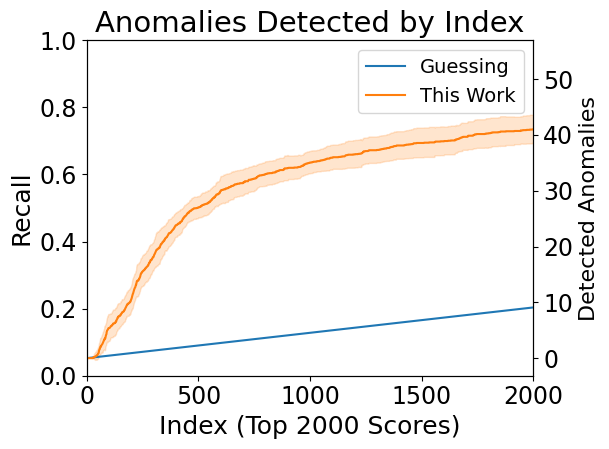

In [176]:
plt.style.use('default')
plot_recall(best.test_scores, best.anom_scores, s='FiguresNew/AnomByInd')


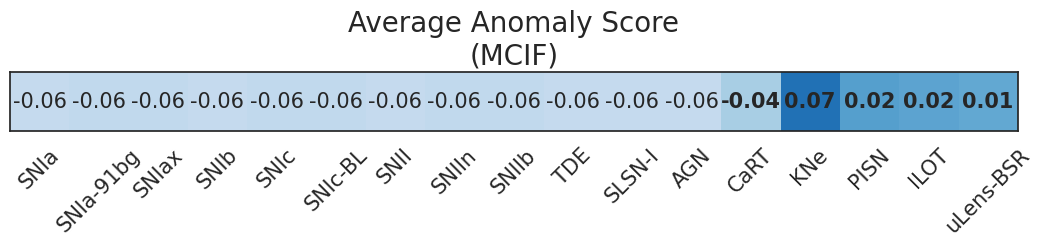

In [215]:
# for best in red:
average_score(best.test_scores, y_val, best.anom_scores, y_data_anom, title=f"Average Anomaly Score\n(MCIF)", savepath=f'FiguresNew/AverageScoreRedo')



In [140]:
def plot_history(model, s= None):
    ins = 'No' if not model.redshift else ''
    
    hist = load(f'Models/RedshiftLatent_{latent_size}_historyFINALFINAL')
    
    plt.plot(range(1, len(hist.history['val_accuracy']) + 1), hist.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(range(1, len(hist.history['accuracy']) + 1), np.array(hist.history['accuracy']), label='Training Accuracy') #  * len(X_val) /  len(X_train)
    
    plt.xlabel("Epoch", fontsize=17)
    plt.ylabel("Accuracy", fontsize=17)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    
    plt.legend()
    
    plt.title('Training/Validation Accuracy', fontsize=19)
    saveplot(s)

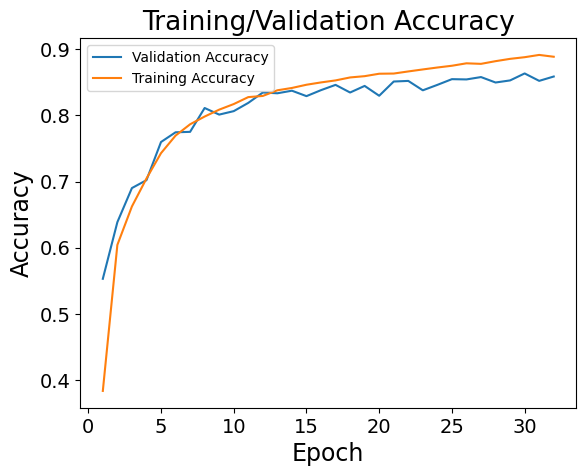

In [141]:
matplotlib.style.use('default')

plot_history(best, s = 'FiguresNew/AccuracyHistory')

In [148]:
color = ['r', 'g', 'y', 'b', 'pink', 'orange', 'gray', 'k', 'm', 'c', 'brown', 'olive']

def get_reducer(data):
    reducer = umap.UMAP(random_state=5, min_dist=0.5, n_neighbors=500)

    reducer.fit(data)
    
    embedding=reducer.transform(data)
    
    return reducer, embedding
    
def plot_umap(embedding, labels, legend, uni=None, title='', savepath='', color=color):
    plt.figure(figsize=(10, 10))
    if uni == None:
        uni = np.unique(labels)
    for cc, i in enumerate(uni):
        
        e=[]
        for ind, point in enumerate(labels):
            # print(point)
            if point == i:
                e.append(embedding[ind])
        
        # print(np.unique(labels))
        # print(cc, e)
        assert(not len(e) == 0)
        e = np.array(e)
        if (type(i) == int):
            plt.scatter(e[:, 0], e[:, 1], label=file_to_class[non_anom_classes[i]], c=color_from_class[file_to_class[non_anom_classes[i]]]) # if cc != 0 else 'grey'
        elif (i in anom_classes):
            plt.scatter(e[:, 0], e[:, 1], label=file_to_class[i], c=color_from_class[i]) # if cc != 0 else 'grey'
        else:
            plt.scatter(e[:, 0], e[:, 1], label=i, c="Grey") # if cc != 0 else 'grey'

        
        
    plt.title(title, fontsize=22)
    plt.xlabel('Arbritary Units', fontsize=17)
    plt.ylabel('Arbritary Units', fontsize=17)
    plt.legend(fontsize=14)
    saveplot(savepath)
    
    # return reducer

In [ ]:
!pip install \
    --extra-index-url=https://pypi.nvidia.com \
    cudf-cu12 dask-cudf-cu12 cuml-cu12 cugraph-cu12 cuspatial-cu12 \
    cuproj-cu12 cuxfilter-cu12 cucim pylibraft-cu12 raft-dask-cu12

In [66]:
import umap
best.te_reducer, best.te_embedding = get_reducer(best.test_latent)

In [67]:
best.tr_reducer, best.tr_embedding = get_reducer(best.train_latent)
best.a_reducer, best.a_embedding = get_reducer(best.anom_latent)
# best.te_reducer, best.te_embedding = get_reducer(best.test_latent)

In [216]:
save("FINALFINAL", best)

In [45]:
best = load("FINALFINAL")

2024-01-05 07:50:29.169256: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-05 07:50:30.442792: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-05 07:50:30.443100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

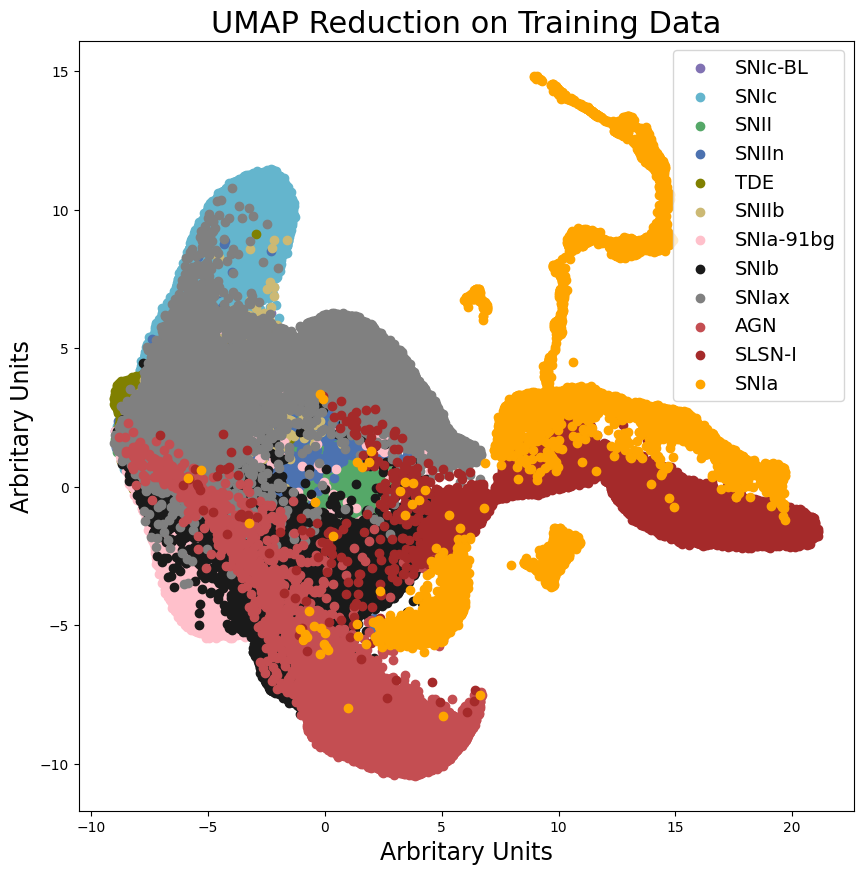

In [149]:
plot_umap(best.tr_embedding, [np.argmax(i) for i in y_train], [file_to_class[i] for i in non_anom_classes], uni = [ordered_class_names.index(file_to_class[i]) for i in non_anom_classes], title = "UMAP Reduction on Training Data", savepath="FiguresNew/UMAPTrain")

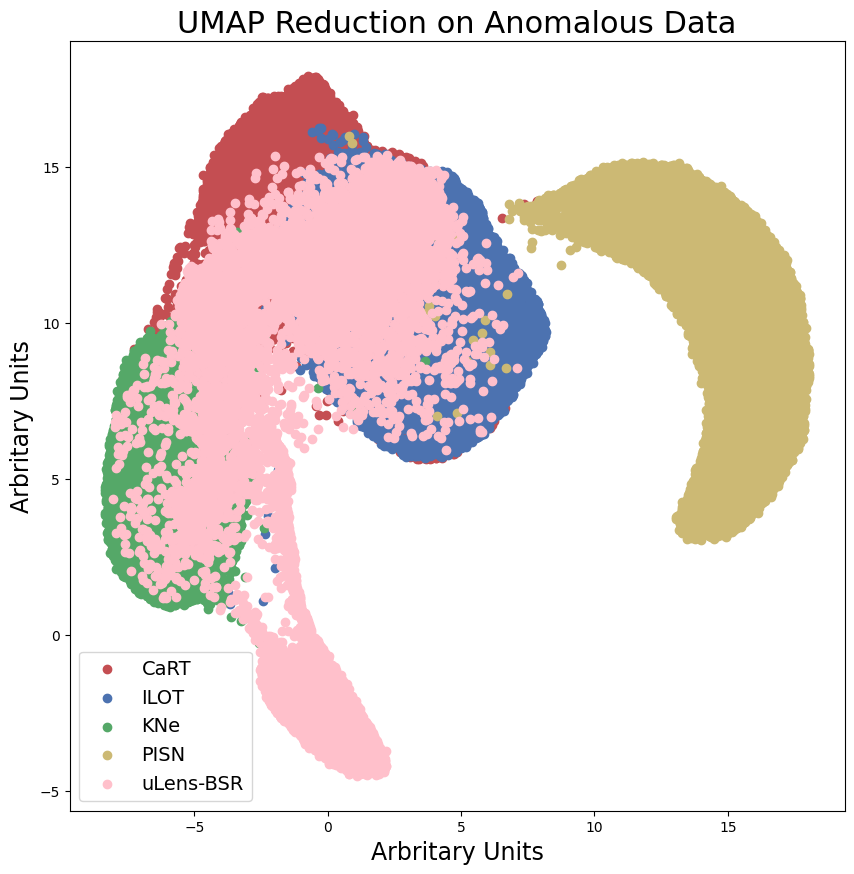

In [150]:
plot_umap(best.a_embedding, y_data_anom, [file_to_class[i] for i in np.unique(y_data_anom)], title="UMAP Reduction on Anomalous Data", savepath="FiguresNew/UMAPAnom")

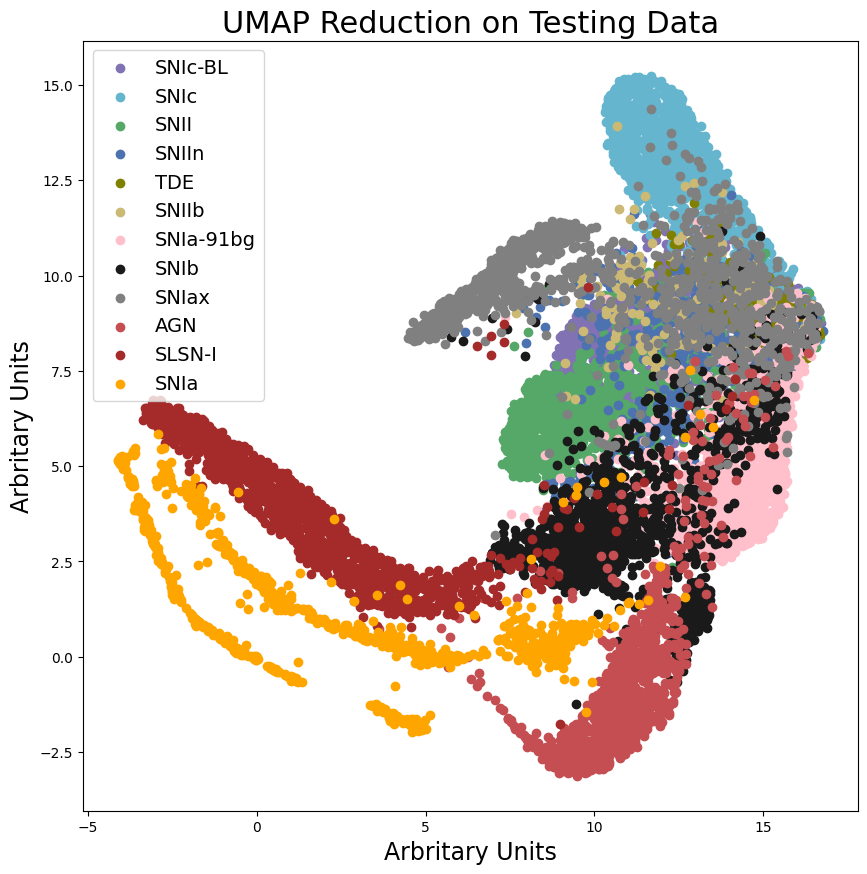

In [151]:
plot_umap(best.te_embedding, [np.argmax(i) for i in y_test], ordered_class_names, uni = [ordered_class_names.index(file_to_class[i]) for i in non_anom_classes], title="UMAP Reduction on Testing Data", savepath="FiguresNew/UMAPTest")

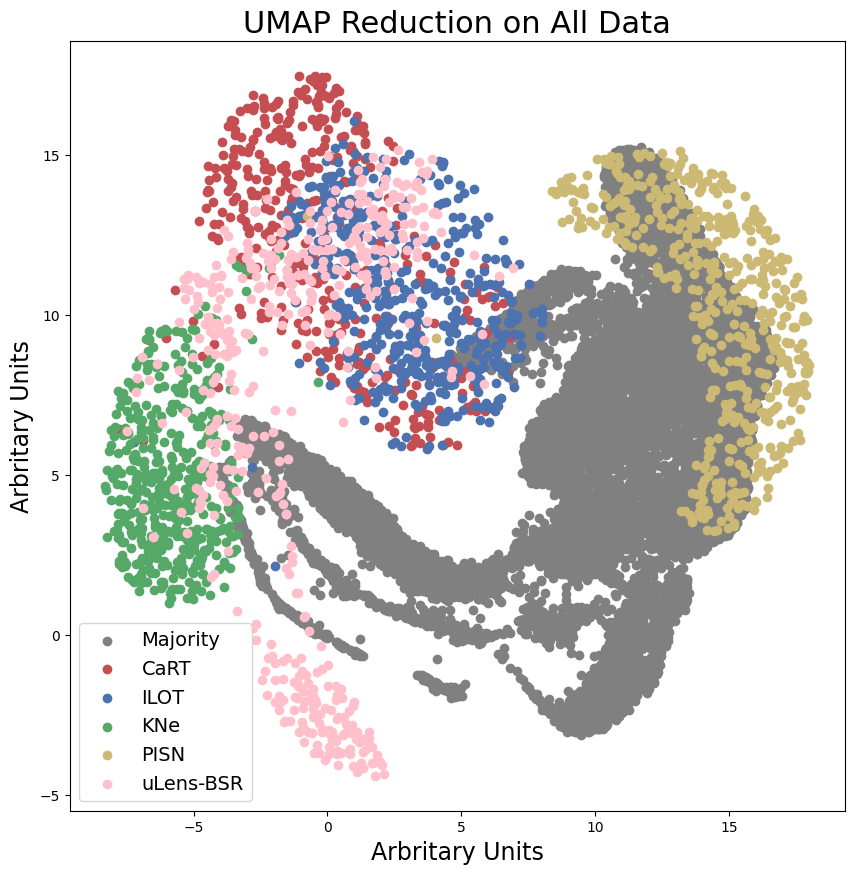

In [152]:
idx = np.random.choice(np.arange(len(best.a_embedding)), round(len(best.te_embedding)/5), replace=False)
vals = best.a_embedding[idx]
labels = np.array(y_data_anom)[idx]

plot_umap(np.append(best.te_embedding, vals, axis=0), ['Majority' for i in y_test] + list(labels), ['Majority'] + [file_to_class[i] for i in np.unique(labels)], title="UMAP Reduction on All Data", savepath="FiguresNew/UMAPAll")

In [153]:
save("FinalTrainedModel", best)


KeyboardInterrupt



In [154]:
def cut_curve(lc, cutoff, ind=False): # assumes scaled cutoff and uses binary search
  # print(lc.shape)
  lo = 0
  hi = len(lc)-1

  while (lo < hi):
    m = (lo + hi)//2
    # print(lc[m][1], cutoff)
    if (lc[m][1] > cutoff or lc[m][1] == 0):
      hi = m
    else:
      lo = m+1

  # print(lo)
  for i in range(hi, len(lc)):
    if (not np.any(lc[i])):
      break

    lc[i] = np.zeros(4)

  if (not ind):
    return lc
  else:
    return hi

In [198]:
# Real Time Results

p_norm = [class_weights[np.argmax(i)] for i in y_test]

sum = np.sum(p_norm)

for i in range(len(p_norm)):
  p_norm[i] /= sum


def get_anomaly_real_time(curves, host_galaxy, inds, model):

    splits = []
    lcs = []
    host_gals = []
    for ind in inds:
        cur = np.zeros((ntimesteps, 4))
        anomaly_scores = []
        host_gal = np.array(host_galaxy[ind])
        curve = curves[ind]
        
        for ind, i in enumerate(curve):
            if (np.count_nonzero(i) == 0):
                break
            cur[ind]=i

            lcs.append(cur.copy())
            host_gals.append(host_gal)
    
        splits.append(len(lcs))

    lcs = np.array(lcs)
    host_gals = np.array(host_gals)

    scores = model.score(model.latent_model.predict([np.array(lcs), np.array(host_gals)]))
    
    ans = []
    prv=0
    for diff in splits:
        ans.append(scores[prv:diff])
        prv=diff
    return ans

def plot_real_median(X_test, x_data_anom, model, savepath=""):
    
    # assert(len(norm_scores) == len(anom_scores) and len(norm_scores) == 200)
    
    norm_median = []
    norm_deviation = []
    
    


    cutoffs = list(range(-30, 75, 5))

    for t in cutoffs:

      cur_values = []
      for ind in range(len(normal_inds)):

        cutoff = cut_curve(np.copy(X_test[normal_inds[ind]]), (t+30)/100, ind=True)

        if (X_test[normal_inds[ind]][cutoff][1] <= (t+30-5)/100):
          continue
        cur_values.append(norm_scores[ind][min(cutoff, len(norm_scores[ind])-1)])



      cur_values=np.array(cur_values)

      norm_median.append(np.median(cur_values))
      norm_deviation.append(np.median(np.absolute(cur_values - np.median(cur_values))))

    norm_median = np.array(norm_median)
    norm_deviation = np.array(norm_deviation)

    fig, ax = plt.subplots(figsize=(8, 8))

    maj_col = u'#1f77b4'
    ax.plot(cutoffs, norm_median, '-', label="Majority", color=maj_col)
    ax.fill_between(cutoffs, norm_median - norm_deviation, norm_median + norm_deviation, alpha=0.2, color=maj_col)
    ax.plot(cutoffs, norm_median, 'o', color=maj_col)


    anom_median = []
    anom_deviation = []

    class_median = {i: [] for i in anom_classes}
    class_deviation = {i: [] for i in anom_classes}

    for t in cutoffs:

      cur_values = []
      cur_class = {i : [] for i in anom_classes}
      for ind in range(len(anom_inds)):
        cutoff = cut_curve(np.copy(x_data_anom[anom_inds[ind]]), (t+30)/100, ind=True)
        if (x_data_anom[anom_inds[ind]][cutoff][1] <= (t+30-5)/100):
          continue

        cur_values.append(anom_scores[ind][min(cutoff, len(anom_scores[ind])-1)])
        
        cur_class[y_data_anom[anom_inds[ind]]].append(anom_scores[ind][min(cutoff, len(anom_scores[ind])-1)])
      
      for c in anom_classes:
        cur_class[c] = np.array(cur_class[c])
        class_median[c].append(np.median(cur_class[c]))
        class_deviation[c].append(np.median(np.absolute(cur_class[c] - np.median(cur_class[c]))))

      cur_values=np.array(cur_values)

      anom_median.append(np.median(cur_values))
      anom_deviation.append(np.median(np.absolute(cur_values - np.median(cur_values))))

    anom_median = np.array(anom_median)
    anom_deviation = np.array(anom_deviation)

    ax.plot(cutoffs, anom_median, '-', label="All Anomalous", color=u'#ff7f0e')
    ax.fill_between(cutoffs, anom_median - anom_deviation, anom_median + anom_deviation, alpha=0.2, color=u'#ff7f0e')
    ax.plot(cutoffs, anom_median, 'o', color=u'#ff7f0e')
    
    # for ind, c in enumerate(anom_classes):
    #     ax.plot(cutoffs, class_median[c], '-', label=file_to_class[c], color=color[ind])
    #     # print(class_mdian[c])
    #     ax.fill_between(cutoffs, np.array(class_median[c]) - np.array(class_deviation[c]), np.array(class_median[c]) + np.array(class_deviation[c]), alpha=0.2, color = color_from_class[c])
    #     ax.plot(cutoffs, class_median[c], 'o', color = color_from_class[c])

    ax.set_xlabel("Time", fontsize=25)
    ax.set_ylabel("Anomaly Score", fontsize=25)
    ax.legend(fontsize=20)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # plt.ylim(-0.1, 0.1)
    

    ax.set_title("Median Anomaly Score Over Time", fontsize=28)
    
    saveplot(savepath)

In [195]:
# Random Sample

normal_inds = np.random.choice(list(range(len(X_test))), 2000, p=p_norm, replace=False)
anom_inds = np.random.choice(list(range(len(x_data_anom))), 2000, p = p_anom, replace=False)

norm_scores = get_anomaly_real_time(X_test, host_gal_test, normal_inds, best)

anom_scores = get_anomaly_real_time(x_data_anom, host_gal_anom, anom_inds, best)

2439/2439 [==============================] - 13s 5ms/step


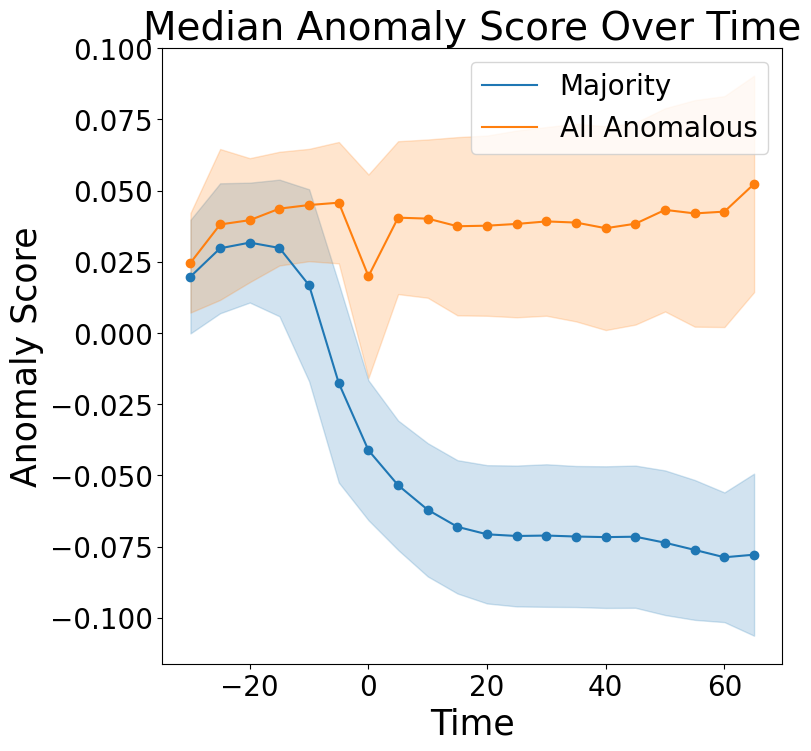

In [199]:
plot_real_median(X_test, x_data_anom, best, "FiguresNew/OverTime")

In [ ]:
# Finding good examples
from sklearn.preprocessing import MinMaxScaler

# fig, axs = plt.subplots(1, 2, figsize=(20, 30), sharey=True)
# fig.subplots_adjust(hspace=0)


done = {i : False for i in file_names}

def plot_curves(name, num = 100):

    band_medians = {'r' : 0.4827, 'g' : 0.6223}
    cnt = 0

    for ind in range(len(x_data)):

        if (target[ind] == name and cut_curve(x_data[ind], 1, ind=True) > 55 and host_galaxy_info[ind][0] < 0.5):
            
            maxi = np.max(x_data[ind][:, 2])
            mini = np.min(x_data[ind][:, 2])
            x_data[ind][:, 2] = (x_data[ind][:, 2] - mini) / (maxi - mini)
            x_data[ind][:, 3] /= (maxi - mini)

            done[target[ind]] = True
            cnt += 1


            red = x_data[ind][x_data[ind][:, 0] == band_medians['r']]
            green = x_data[ind][x_data[ind][:, 0] == band_medians['g']]
            plt.errorbar(red[:, 1], ((red[:, 2] + 30) * 100), fmt='^', alpha=0.3, color = colors[file_names.index(target[ind]) % len(colors)])
            plt.errorbar(green[:, 1], ((green[:, 2] + 30) * 100), fmt='o', alpha=1, color = colors[file_names.index(target[ind])  % len(colors)])

            # axs[int(cnt > 8)].errorbar(new_vals[:, 1] * 100 - 30, new_vals[:, 2] + prv_mx, fmt='o', color = colors[file_names.index(target[ind]) % len(colors)])
            # plt.text(0, prv_mx + x_data[0][2] + 0.5, file_to_class[target[ind]], fontsize=20, color = colors[file_names.index(target[ind]) % len(colors)])

            # prv_mx += np.max(new_vals[:, 2]) + 0.5
            
            plt.ylabel('Scaled Flux + Offset', fontsize=15)
            plt.xlabel('Time Since Trigger', fontsize=15)
            plt.title(str(ind))
            
            plt.show()

        if (cnt == 100):
            break
    
    # plt.title('Sample Light Curves')
    # plt.ylim(-1, 29)
    # saveplot("Figures/samplecurves")
    
plot_curves(class_to_file['uLens-BSR'])

In [363]:
interesting_inds = [6, 13024, 26037, 39092, 44415, 45914, 47312, 60322, 73318, 85658, 97110, 114369, 120846, 130758, 144661, 153253, 164107]

In [364]:
class_to_file = {v: k for k, v in file_to_class.items()}

In [28]:
for key, value in file_to_class.items():
    color_from_class[value] = color_from_class[key]

KeyError: 'lc_classnum_CART_63_old.pickle'

{'SNIa': 'orange',
 'SNIa-91bg': 'pink',
 'SNIax': 'gray',
 'SNIb': 'k',
 'SNIc': 'c',
 'SNIc-BL': 'm',
 'SNII': 'g',
 'SNIIn': 'b',
 'SNIIb': 'y',
 'TDE': 'olive',
 'SLSN-I': 'brown',
 'AGN': 'r',
 'lc_classnum_CART_63_old.pickle': 'r',
 'lc_classnum_Kilonova_99.pickle': 'g',
 'lc_classnum_PISN_61_old.pickle': 'y',
 'lc_classnum_ILOT_62_old.pickle': 'b',
 'lc_classnum_uLens-BSR_90_old.pickle': 'pink'}

In [ ]:

from sklearn.preprocessing import MinMaxScaler


plt.figure(figsize=(10, 40))
# fig, axs = plt.subplots(1, 2, figsize=(20, 30), sharey=True)
# fig.subplots_adjust(hspace=0)


done = {i : False for i in file_names}



band_medians = {'r' : 0.4827, 'g' : 0.6223}
prv_mx = 0
cnt = 0

for ind in [numbers have changed due to slight switch in preprocessing; will fix this later] # [6, 13024, 26037, 39092, 44415, 45914, 47312, 60322, 73318, 97110, 85658, 114369, 130758, 144661, 153253, 164107, 120846]:

    maxi = np.max(x_data[ind][:, 2])
    mini = np.min(x_data[ind][:, 2])
    x_data[ind][:, 2] = (x_data[ind][:, 2] - mini) / (maxi - mini)
    x_data[ind][:, 3] /= (maxi - mini)

    done[target[ind]] = True
    cnt += 1
    if (cnt < 10):
        continue

    red = x_data[ind][x_data[ind][:, 0] == band_medians['r']]
    green = x_data[ind][x_data[ind][:, 0] == band_medians['g']]
    plt.errorbar((red[:, 1]) * 100 - 30, red[:, 2] + prv_mx, fmt='^', alpha=0.3, color = color_from_class[file_to_class[target[ind]]])
    plt.errorbar((green[:, 1]) * 100 - 30, green[:, 2] + prv_mx, fmt='o', alpha=1, color = color_from_class[file_to_class[target[ind]]])

    # axs[int(cnt > 8)].errorbar(new_vals[:, 1] * 100 - 30, new_vals[:, 2] + prv_mx, fmt='o', color = colors[file_names.index(target[ind]) % len(colors)])
    plt.text(0, prv_mx + 0.5, file_to_class[target[ind]] + "        ", fontsize=20, color = color_from_class[file_to_class[target[ind]]], ha='right', va='bottom')

    prv_mx += 1.2

        
plt.ylabel('Scaled Flux + Offset', fontsize=20)
plt.xlabel('Time Since Trigger', fontsize=20)

# plt.title('Sample Light Curves')
# plt.ylim(-1, 29)
saveplot("FiguresNew/samplecurves2")

In [204]:
class_weights = {i : 0 for i in range(y_train.shape[1])}

for value in y_train:
  class_weights[np.argmax(value)]+=1

for value in y_val:
  class_weights[np.argmax(value)]+=1

for id in class_weights.keys():
  class_weights[id] = (len(y_train) + len(y_val)) / class_weights[id]

sample_weights = [class_weights[np.argmax(i)] for i in y_train] + [class_weights[np.argmax(i)] for i in y_val]

from sklearn.ensemble import IsolationForest

best.iforest = IsolationForest(random_state=0, max_samples = 'auto', n_estimators=200).fit(np.append(best.train_latent, best.val_latent, axis=0), sample_weight=sample_weights)



In [205]:
best.single_scores = -best.iforest.decision_function(best.test_latent)
best.single_scores_anom = -best.iforest.decision_function(best.anom_latent)

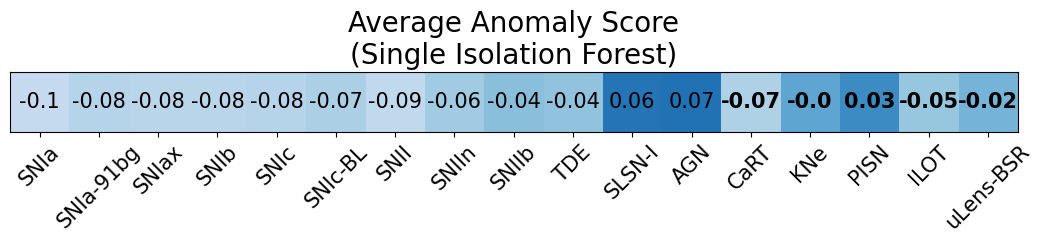

In [206]:
average_score(best.single_scores, y_test, best.single_scores_anom, y_data_anom, title="Average Anomaly Score\n(Single Isolation Forest)", savepath="FiguresNew/AverageScoreSingle")

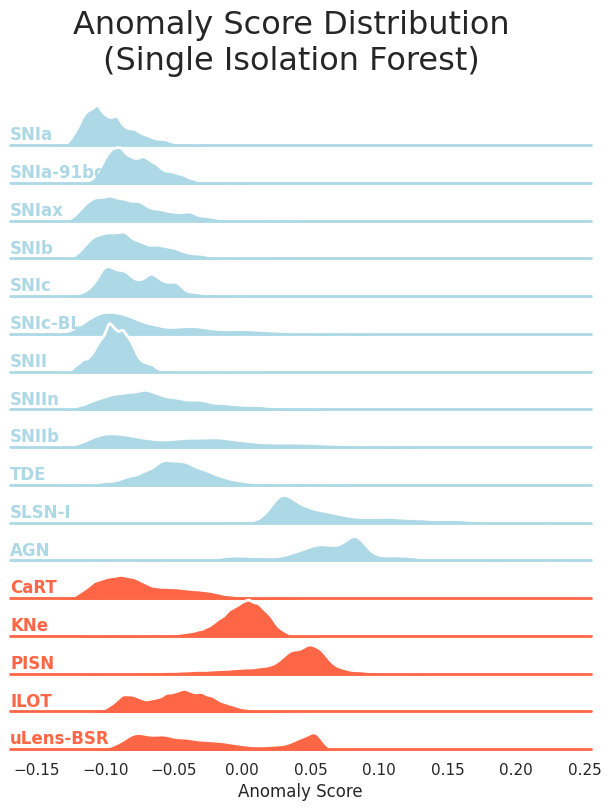

In [207]:
plot_dist(best.single_scores, y_test, best.single_scores_anom, y_data_anom, title="Anomaly Score Distribution\n(Single Isolation Forest)", savepath="FiguresNew/ScoreDistSingle")

In [208]:
import random, time
times = []

for _ in range(10):
  ind = random.randint(0, len(X_test))
  start_time = time.time()
  pred = best.latent_model.predict([np.array([X_test[ind]]), np.array([host_gal_test[ind]])], verbose=0)

  score = best.score(pred[0].reshape(1, -1))
  end_time = time.time()
  times.append(1000*(end_time - start_time))

In [209]:
print(np.mean(times))

1280.0665855407715


usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           [--super-prefix=<path>] [--config-env=<name>=<envvar>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone     Clone a repository into a new directory
   init      Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add       Add file contents to the index
   mv        Move or rename a file, a directory, or a symlink
   restore   Restore working tree files
   rm        Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect    Use binary search to find th

In [85]:
import tensorflow as tf

In [186]:
from sklearn.metrics import silhouette_score

class sil_loss(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()

    def call(self, y_true, y_pred): # y_true is encoding of class and y_pred is latent space
        # full = tf.stack([y_pred, y_true], axis=0)
        # print(y_pred.shape, y_true.shape)

        return silhouette_score(list(y_pred), [np.argmax(i) for i in list(y_true)])
    

In [187]:
def create_sil(latent_size):

    num_classes = len(class_weights)
    n_features = 4

    input_1 = Input((ntimesteps, n_features), name='lc')  # X.shape = (Nobjects, Ntimesteps, 4)

    masking_input1 = Masking(mask_value=0.)(input_1)

    lstm1 = GRU(100, return_sequences=True, activation='tanh')(masking_input1)
    lstm2 = GRU(100, return_sequences=False, activation='tanh')(lstm1)

    dense1 = Dense(100, activation='tanh')(lstm2)

    input_2 = Input(shape = (2, ), name='host')

    dense2 = Dense(10)(input_2)

    merge1 = concatenate([dense1, dense2])

    dense3 = Dense(100, activation='relu')(merge1)

    output = Dense(latent_size, activation='relu', name='latent')(dense3)

    # output = Dense(num_classes, activation='softmax')(dense4)

    model = keras.Model(inputs=[input_1, input_2], outputs=output)

    model.compile(loss = sil_loss(), optimizer="adam", metrics=['accuracy'])
    
    return model

In [188]:
model = create_sil(9)

In [189]:
early_stopping = EarlyStopping(
                              patience=5,
                              min_delta=0.001,                               
                              monitor="val_loss",
                              restore_best_weights=True
                              )



try:
    history = model.fit(x = [X_train, host_gal_train], validation_data=([X_val, host_gal_val], y_val), y = y_train, epochs=40, batch_size = 128, class_weight = class_weights, callbacks=[early_stopping])
except Exception as e:
    print(e)
    pass

Epoch 1/40
Tensor("IteratorGetNext:2", shape=(None, 12), dtype=float32)
in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/tmp/ipykernel_175235/3797929680.py", line 12, in call  *
        return silhouette_score(list(y_pred), [np.argmax(i) for i in list(y_true)])

    OperatorNotAllowedInGraphError: Iterating over a symbolic `tf.Tensor` is not allowed: AutoGraph did convert this function. This might indicate you are trying to use an unsupported feature.



In [207]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.autograd import variable

ModuleNotFoundError: No module named 'torch'

In [ ]:
class SilNet(nn.Module):
    def __init__(self, intput_size, gru_size, latent_size):
        super(SilNet, self).__init__()
        self.fc1 = nn.Linear(input_size, gru_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(gru_size, gru_size)
        self.relu2 = nn.ReLU()
        self.fc1 = nn.Linear(gru_size, latent_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(x)
        out = self.fc2(x)
        out = self.relu2(x)
        out = self.fc3(x)
        return out
        
        

In [ ]:
batch_size = 1024

train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
